### DIFFERENTIATION IN PYTHON

In [1]:
import numpy as np

***1. Analytically***

In [2]:
def f(x):
    return x ** 2

def dfdx(x):
    return 2 * x


In [3]:
array = np.array([0,1,2,3,4,5])

In [4]:
print(f'x is {array}')
print(f'f(x) is {f(array)}')
print(f'dfdx(x) is {dfdx(array)}')

x is [0 1 2 3 4 5]
f(x) is [ 0  1  4  9 16 25]
dfdx(x) is [ 0  2  4  6  8 10]


In [5]:
import matplotlib.pyplot as plt

def plot_f_and_df(f1,f2,x_min=-5,x_max=5,label_1='fx',label_2='dfdx'):
    array = np.linspace(x_min,x_max,50)

    fig = plt.figure()
    ax = fig.subplots(1,1)
    
    ax.spines['left'].set_position('center')
    ax.spines['bottom'].set_position('zero')
    ax.spines['top'].set_color('None')
    ax.spines['right'].set_color('None')
    

    ax.plot(array,f1(array),'r',label=label_1)
    if isinstance(f2,np.ndarray):
        ax.plot(array,f2,'bo',label=label_2)
    else:
        ax.plot(array,f2(array),'b',label=label_2) 

    plt.legend()
    plt.show()

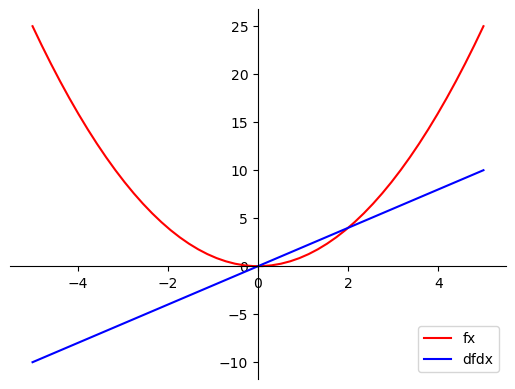

In [6]:
plot_f_and_df(f,dfdx)

***2.Symbolic Differentiation using sympy library***

In [7]:
import sympy

In [8]:
sympy.sqrt(18)

3*sqrt(2)

In [9]:
sympy.N(sympy.sqrt(18),5)

4.2426

In [10]:
x,y = sympy.symbols('x y')

In [11]:
expr = x * ((2*x) + 3) + x*y
expr

x*y + x*(2*x + 3)

In [12]:
expr = sympy.expand(expr)
expr

2*x**2 + x*y + 3*x

In [13]:
sympy.factor(expr - x*y)

x*(2*x + 3)

In [14]:
expr.evalf(subs={x:1,y:3})

8.00000000000000

In [15]:
sympy.diff(expr,x)

4*x + y + 3

In [16]:
sympy.diff(2*sympy.cos(x) + sympy.exp(-x),x)

-2*sin(x) - exp(-x)

In [17]:
sympy.diff(expr,x).evalf(subs={x:0,y:1})

4.00000000000000

In [18]:
# Using lambdify so functions can be evaluated on arrays
from sympy.utilities.lambdify import lambdify

In [19]:
diff = sympy.diff(expr,x)
diff_array_func = lambdify(x,diff,'numpy')

In [20]:
diff_array_func(array)

array([y + 3, y + 7, y + 11, y + 15, y + 19, y + 23], dtype=object)

In [21]:
sympy_f = x ** 2
sympy_f_np = lambdify(x, sympy_f, 'numpy')
sympy_f

x**2

In [22]:
sympy_diff = sympy.diff(sympy_f,x)
sympy_diff_np = lambdify(x, sympy_diff, 'numpy')
sympy_diff

2*x

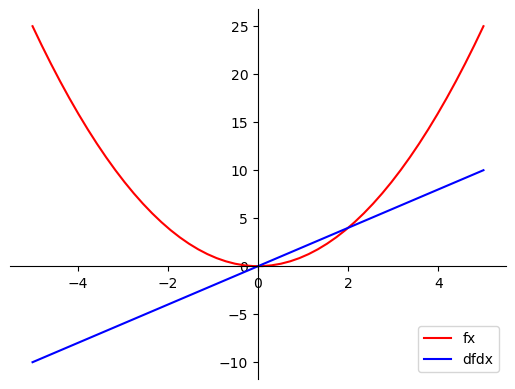

In [23]:
plot_f_and_df(sympy_f_np,sympy_diff_np)

***3.Numerical Differentiation using numpy***

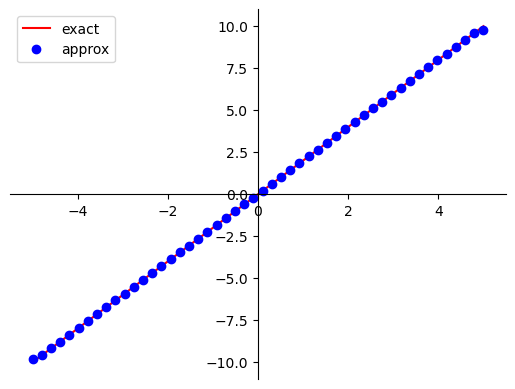

In [24]:
array_2 = np.linspace(-5,5,50)
grad = np.gradient(f(array_2),array_2)

plot_f_and_df(sympy_diff_np,grad,label_1='exact',label_2='approx')

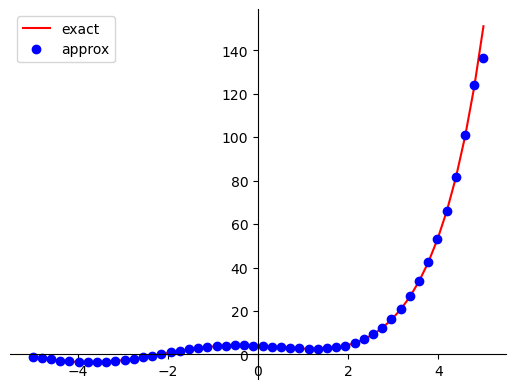

In [25]:
def complex_function(x):
    return 3 * np.sin(x) + 2 * np.cos(x) + np.exp(x)

sympy_complex_function = 3 * sympy.sin(x) + 2 * sympy.cos(x) + sympy.exp(x)

grad_complex = np.gradient(complex_function(array_2),array_2)
sympy_complex_diff = lambdify(x,sympy.diff(sympy_complex_function,x),'numpy') 

plot_f_and_df(sympy_complex_diff,grad_complex,label_1='exact',label_2='approx')

***4.Automatic Differentiation using JAX***

In [26]:
from jax import grad, vmap
import jax.numpy as jnp

In [27]:
jax_array = jnp.array([0,1,2,3]).astype('float32')
jax_array

Array([0., 1., 2., 3.], dtype=float32)

In [28]:
jnp.array(array.astype('float32'))

Array([0., 1., 2., 3., 4., 5.], dtype=float32)

In [29]:
try:
    jax_array[2] = 3
except Exception as e:
    print(e)

'<class 'jaxlib.xla_extension.ArrayImpl'>' object does not support item assignment. JAX arrays are immutable. Instead of ``x[idx] = y``, use ``x = x.at[idx].set(y)`` or another .at[] method: https://jax.readthedocs.io/en/latest/_autosummary/jax.numpy.ndarray.at.html


In [30]:
jax_array.at[2].set(3.0)

Array([0., 1., 3., 3.], dtype=float32)

In [31]:
print(f'Analaytically dfdx at 3 is {dfdx(3)}')
print(f'Using sympy dfdx at 3 is {sympy_diff.evalf(subs={x:3})}')
print(f'Using jax dfdx is {grad(f)(3.0)}')

Analaytically dfdx at 3 is 6
Using sympy dfdx at 3 is 6.00000000000000
Using jax dfdx is 6.0


In [32]:
# Note JAX grad cant be used on ints
try:
    grad(f)(3)
except Exception as e:
    print(e)

grad requires real- or complex-valued inputs (input dtype that is a sub-dtype of np.inexact), but got int32. If you want to use Boolean- or integer-valued inputs, use vjp or set allow_int to True.


In [33]:
# Note JAX needs vmap to work on arrays
try:
    grad(f)(array.astype('float32'))
except Exception as e:
    print(e)

Gradient only defined for scalar-output functions. Output had shape: (6,).


In [34]:
# Use vmap to work on arrays
vmap(grad(f))(array.astype('float32'))

Array([ 0.,  2.,  4.,  6.,  8., 10.], dtype=float32)

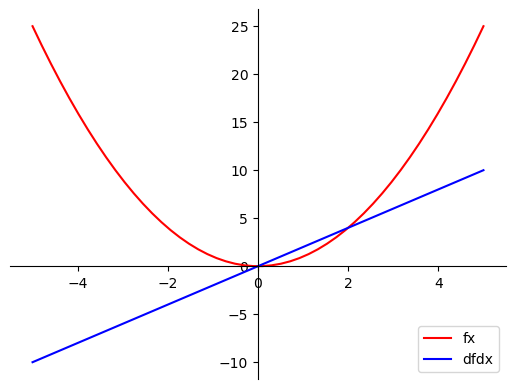

In [35]:
plot_f_and_df(f,vmap(grad(f)))

The function below will show the plots of different mathematical functions and their derivative.  
Change the functions as you wish and adjust the time variable to view the plots for longer.  
The differentiation uses JAX

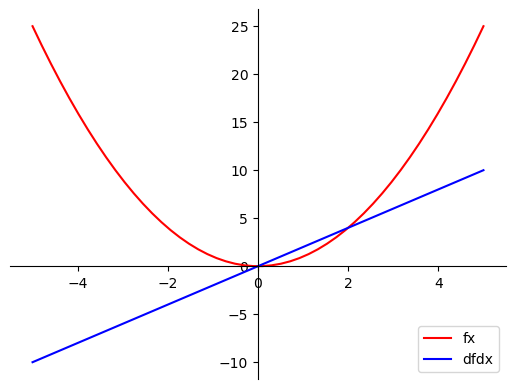

In [36]:
def g(y):
    return y ** 2
    #return y ** 3
    #return jnp.sin(y)
    #return jnp.cos(y)
    #return jnp.exp(y)
    #return jnp.log(y)
    #return jnp.log(y) + jnp.log(1-y)
    #return y * (1-y)
    #return 3 * jnp.sin(y) + 2 * jnp.cos(y) + jnp.exp(y)

plot_f_and_df(g,vmap(grad(g)))